In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
import seaborn as sns
%matplotlib inline 
#This line helped me draw the plot
#%matplotlib notebook

In [13]:
# Generating two points to construct the line
x1_targetf = np.random.uniform(-1,1,2)
x2_targetf = np.random.uniform(-1,1,2)

# Computing the slope m and the y-intercept b
m = (x2_targetf[1]-x2_targetf[0])/(x1_targetf[1]-x1_targetf[0])
b_target = x2_targetf[0] - m * x1_targetf[0]

# Computing the x2 value of the extremities of the line knowing that the x1 
# values range is [-1, 1]
x2_lefttargetf = m*(-1) + b_target
x2_righttargetf = m*(1) + b_target

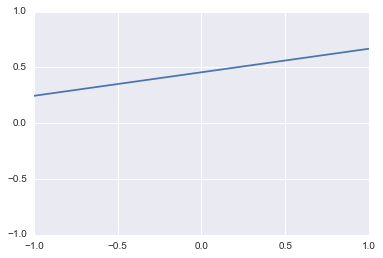

In [14]:
# Plot of target function
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot([-1,1], [x2_lefttargetf,x2_righttargetf])
ax1.axis((-1,1,-1,1))
plt.show()

In [15]:
# Generating N training data points
N = 25
x1_input = np.random.uniform(-1,1,N)
x2_input = np.random.uniform(-1,1,N)

In [16]:
y_output = []

# Computing the y_output (class or category) from the target function
for index, each in enumerate(x1_input):
    # Computing the value of x2 if it was on the line
    x2_line = m*(each) + b_target

    # Checking the value of x2 corresponding to that x1 with the x2 from the line
    # Assigning a -1 or +1 class to it
    if x2_input[index] < x2_line:
        y_output.append(-1.0)
    else:
        y_output.append(1.0)

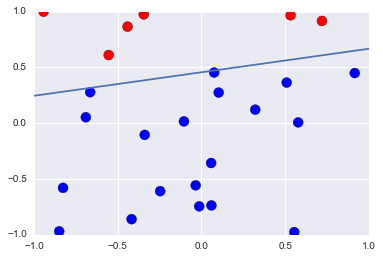

In [17]:
# Plotting the training points
plt.plot([-1,1], [x2_lefttargetf,x2_righttargetf])
plt.scatter(
    x1_input,
    x2_input,
    c=y_output,
    cmap='bwr',
    alpha=1, 
    s=100, 
    edgecolors='k'
    );
plt.axis((-1,1,-1,1))
plt.show()

In [18]:
# Combining the data vectors into an X matrix of N vectors of features
X_svm = np.column_stack((
    x1_input,
    x2_input
    ))
# Changing the class list into a Numpy array
y_output = np.array(y_output)
# Initializing the N x N Gram matrix
K = np.zeros(
    shape = (
        len(x1_input), 
        len(x1_input)
        )
    )

# Computing the inner products for each pair of vectors
for i in range(len(x1_input)):
    for j in range(len(x1_input)):
        K[i,j] = np.dot(X_svm[i], X_svm[j])

# Generating all the matrices and vectors
P = cvxopt.matrix(np.outer(y_output, y_output) * K)
q = cvxopt.matrix(np.ones(len(x1_input)) * -1)
G = cvxopt.matrix(np.vstack([
    np.eye(len(x1_input)) * -1,
    np.eye(len(x1_input))
    ]))
h = cvxopt.matrix(np.hstack([
    np.zeros(len(x1_input)),
    np.ones(len(x1_input)) * 999999999.0
    ])) 
A = cvxopt.matrix(y_output, (1,len(x1_input)))
b = cvxopt.matrix(0.0)

# Solving the QP problem
solution = cvxopt.solvers.qp(P, q, G, h, A, b)

# Display the Lagrange multipliers
a = np.ravel(solution['x'])
print a

# Create a boolean list of non-zero alphas
ssv = a > 1e-5
# Select the index of these alphas. They are the support vectors.
ind = np.arange(len(a))[ssv]
# Select the corresponding alphas a, support vectors sv and class labels sv_y
a = a[ssv]
sv = X_svm[ssv]
sv_y = y_output[ssv]

     pcost       dcost       gap    pres   dres
 0:  3.8064e+17 -1.1469e+19  2e+19  4e-01  3e-07
 1:  5.9634e+17 -1.3664e+18  2e+18  1e-02  2e+01
 2:  1.3921e+17 -2.1282e+17  4e+17  1e-03  1e+00
 3:  2.1354e+16 -2.6388e+16  5e+16  6e-08  7e-08
 4:  3.0873e+15 -3.4899e+15  7e+15  1e-08  6e-08
 5:  4.4363e+14 -4.9297e+14  9e+14  4e-08  2e-08
 6:  6.3633e+13 -7.0209e+13  1e+14  1e-08  5e-09
 7:  9.1217e+12 -1.0040e+13  2e+13  1e-09  2e-09
 8:  1.3073e+12 -1.4375e+12  3e+12  3e-10  8e-10
 9:  1.8734e+11 -2.0593e+11  4e+11  3e-10  4e-10
10:  2.6846e+10 -2.9506e+10  6e+10  7e-11  1e-10
11:  3.8469e+09 -4.2281e+09  8e+09  2e-11  6e-11
12:  5.5122e+08 -6.0590e+08  1e+09  4e-11  2e-11
13:  7.8976e+07 -8.6835e+07  2e+08  3e-11  8e-12
14:  1.1313e+07 -1.2448e+07  2e+07  3e-12  4e-12
15:  1.6193e+06 -1.7854e+06  3e+06  3e-12  1e-12
16:  2.3140e+05 -2.5650e+05  5e+05  4e-13  4e-13
17:  3.2911e+04 -3.7002e+04  7e+04  3e-13  2e-13
18:  4.6197e+03 -5.3972e+03  1e+04  9e-14  5e-14
19:  6.2249e+02 -8.10

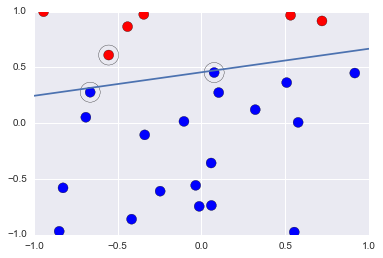

In [19]:
# Plotting the support vectors
plt.scatter(
    sv[:,0],
    sv[:,1],
    facecolors='none',
    s=400, 
    edgecolors='k'
    )
plt.plot([-1,1], [x2_lefttargetf,x2_righttargetf])
plt.scatter(
    x1_input,
    x2_input,
    c=y_output,
    cmap='bwr',
    alpha=1, 
    s=100, 
    edgecolors='k'
    );
plt.axis((-1,1,-1,1))
plt.show()

w_svm: [-1.55175663  6.51860422]
b_svm: -3.84137422047


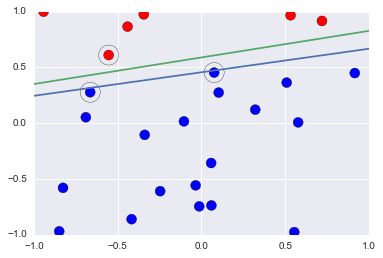

In [20]:
# Computing the weights w_svm
w_svm = np.zeros(X_svm.shape[1])

for each in range(len(a)):
    w_svm += a[each] * sv_y[each] * sv[each]
print 'w_svm:', w_svm

# Computing the intercept b_svm
b_svm = sv_y[0] - np.dot(w_svm, sv[0])
print 'b_svm:', b_svm

# Plot of SVM function
x2_lefttargeth = -(w_svm[0]*(-1)+b_svm)/w_svm[1]
x2_righttargeth = -(w_svm[0]*(1)+b_svm)/w_svm[1]

plt.plot([-1,1], [x2_lefttargetf,x2_righttargetf])
plt.plot([-1,1], [x2_lefttargeth,x2_righttargeth])

plt.scatter(
    sv[:,0],
    sv[:,1],
    facecolors='none',
    s=400, 
    edgecolors='k'
    )

plt.scatter(
    x1_input,
    x2_input,
    c=y_output,
    cmap='bwr',
    alpha=1, 
    s=100, 
    edgecolors='k'
    );
plt.axis((-1,1,-1,1))
plt.show()